<a href="https://colab.research.google.com/github/amit9594/cotton-plant-disease-detection/blob/main/adv_algo_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                          title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned     Students Performance | Clean Dataset               10KB  2024-10-29 19:32:26           3841         72  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset      11KB  2024-09-28 20:21:12          24504        491  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                       22KB  2024-10-06 11:27:38          14166        201  1.0              
zeeshier/weather-forecast-dataset                            Weather Forecast Dataset

In [8]:
!kaggle datasets download -d dhamur/cotton-plant-disease

Dataset URL: https://www.kaggle.com/datasets/dhamur/cotton-plant-disease
License(s): ODbL-1.0
100% 3.97G/3.98G [00:29<00:00, 159MB/s]
100% 3.98G/3.98G [00:29<00:00, 143MB/s]


In [9]:
!unzip /content/cotton-plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/contrast_9.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_1.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_10.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_11.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_12.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_13.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_14.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_15.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_16.jpeg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_17.jpg  
  inflating: Main dataset-20230209T170929Z-001/Main dataset/Healthy/crop_18.jpg  
  inflating: Main dataset-20230209T170929Z-0

In [10]:
!pip install split-folders
import splitfolders
splitfolders.ratio('/content/Cotton leaves/40 Images', output="/content/Cotton leaves/new_1", seed=1337, ratio=(.8, 0.2))

Copying files: 4788 files [00:01, 3619.06 files/s]


# For train set:

In [11]:
import os

# base = '/content/Cotton leaves/output/train' 1st old
base = '/content/Cotton leaves/new_1/train' # 1st new


folders = os.listdir(base)

all_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)

    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)

    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]

    all_filenames.append(full_path)

print(all_filenames)

/content/Cotton leaves/new_1/train/Healthy
/content/Cotton leaves/new_1/train/Army worm
/content/Cotton leaves/new_1/train/Bacterial blight
/content/Cotton leaves/new_1/train/Aphids
/content/Cotton leaves/new_1/train/Target spot
/content/Cotton leaves/new_1/train/Powdery mildew
['/content/Cotton leaves/new_1/train/Healthy', '/content/Cotton leaves/new_1/train/Army worm', '/content/Cotton leaves/new_1/train/Bacterial blight', '/content/Cotton leaves/new_1/train/Aphids', '/content/Cotton leaves/new_1/train/Target spot', '/content/Cotton leaves/new_1/train/Powdery mildew']


In [12]:
len(all_filenames)

6

In [13]:
from glob import glob
train_path = '/content/Cotton leaves/output/train'

# useful for getting number of classes
folders = glob(train_path + '/*')
len(folders)

0

# For test set

In [14]:
import os

# base = '/content/Cotton leaves/output/test' 2nd change
base = '/content/Cotton leaves/new_1/val' # 2nd new

folders = os.listdir(base)

all_test_filenames = []

for folder_name in folders:

    # add base path to folder name to have full path
    full_path = os.path.join(base, folder_name)
    print(full_path)

    # get filenames (without path) in folder
    # filenames = os.listdir(full_path)

    # add path to filenames
    # filenames = [os.path.join(full_path, name) for name in filenames]

    all_test_filenames.append(full_path)

print(all_test_filenames)

/content/Cotton leaves/new_1/val/Healthy
/content/Cotton leaves/new_1/val/Army worm
/content/Cotton leaves/new_1/val/Bacterial blight
/content/Cotton leaves/new_1/val/Aphids
/content/Cotton leaves/new_1/val/Target spot
/content/Cotton leaves/new_1/val/Powdery mildew
['/content/Cotton leaves/new_1/val/Healthy', '/content/Cotton leaves/new_1/val/Army worm', '/content/Cotton leaves/new_1/val/Bacterial blight', '/content/Cotton leaves/new_1/val/Aphids', '/content/Cotton leaves/new_1/val/Target spot', '/content/Cotton leaves/new_1/val/Powdery mildew']


In [15]:
valid_path = '/content/Cotton leaves/new_1/val'

test_folders = glob(valid_path+ '/*')

len(test_folders)

6

# USING RESNET

In [16]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools

In [17]:
# re-size all the images to this
IMAGE_SIZE = [256, 256] # feel free to change depending on dataset

# training config:
epochs = 15
batch_size = 32

In [18]:
train_path = '/content/Cotton leaves/new_1/train'
valid_path = '/content/Cotton leaves/new_1/val'

In [19]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [20]:
# useful for getting number of classes
folders = glob(train_path + '/*')

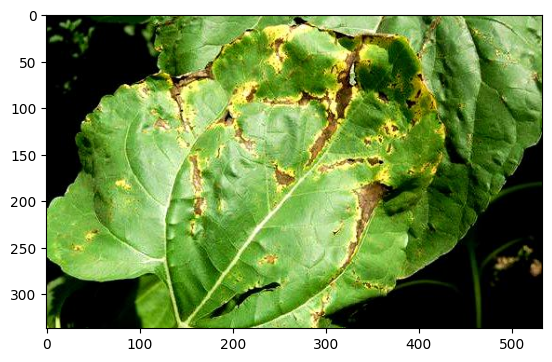

In [21]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)));

In [22]:
len(folders)

6

In [23]:
# resnet base
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [24]:
# don't train existing weights
for layer in res.layers:
  layer.trainable = False

In [25]:
# our layers - you can add more if you want
x = Flatten()(res.output)
# x = Dense(1000, activation='relu')(x) # example
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=res.input, outputs=prediction)

In [27]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [29]:
# create an instance of ImageDataGenerator
train_gen = ImageDataGenerator(
  width_shift_range=0.1,
  height_shift_range=0.1,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [30]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = val_gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 958 images belonging to 6 classes.
{'Aphids': 0, 'Army worm': 1, 'Bacterial blight': 2, 'Healthy': 3, 'Powdery mildew': 4, 'Target spot': 5}


min: -123.68 max: 151.061


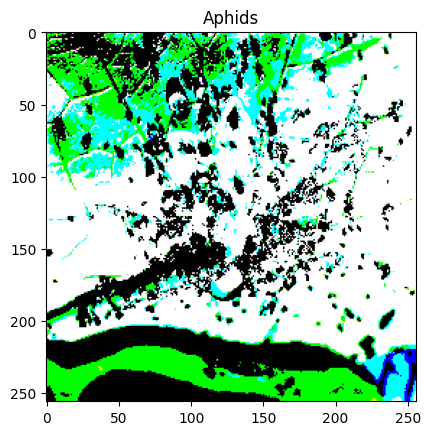

In [31]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [32]:
# create generators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 3830 images belonging to 6 classes.
Found 958 images belonging to 6 classes.


In [34]:
# fit the model
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)

Epoch 1/10
119/119 [==============================] - 119s 999ms/step - loss: 1.1028 - accuracy: 0.9492 - val_loss: 0.7893 - val_accuracy: 0.9623
Epoch 3/10
119/119 [==============================] - 117s 984ms/step - loss: 1.1136 - accuracy: 0.9502 - val_loss: 0.9606 - val_accuracy: 0.9644
Epoch 4/10
119/119 [==============================] - 120s 1s/step - loss: 0.8705 - accuracy: 0.9679 - val_loss: 0.8516 - val_accuracy: 0.9784
Epoch 5/10
119/119 [==============================] - 119s 994ms/step - loss: 0.6334 - accuracy: 0.9695 - val_loss: 0.6989 - val_accuracy: 0.9774
Epoch 6/10
119/119 [==============================] - 117s 985ms/step - loss: 0.8378 - accuracy: 0.9745 - val_loss: 1.4064 - val_accuracy: 0.9644
Epoch 7/10
119/119 [==============================] - 119s 994ms/step - loss: 1.0473 - accuracy: 0.9708 - val_loss: 1.1679 - val_accuracy: 0.9709
Epoch 8/10
119/119 [==============================] - 119s 996ms/step - loss: 0.7177 - accuracy: 0.9781 - val_loss: 0.8379 - va

In [35]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [36]:
model.save('cotton_disease_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
model_json = model.to_json()
with open("cotton_disease_json.json",'w') as json_file:
    json_file.write(model_json)
model.save("cotton_disease_detection.h5")

# **Loss **

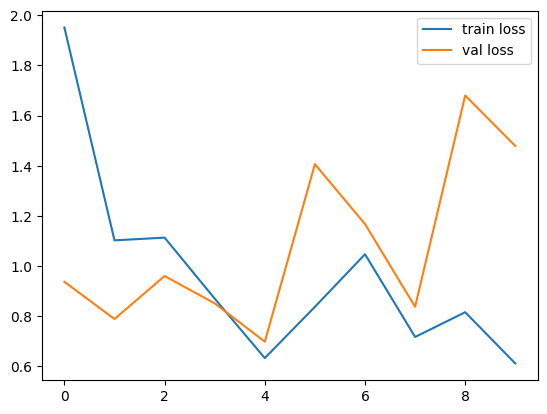

In [38]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

# **Accuracy Analysis **

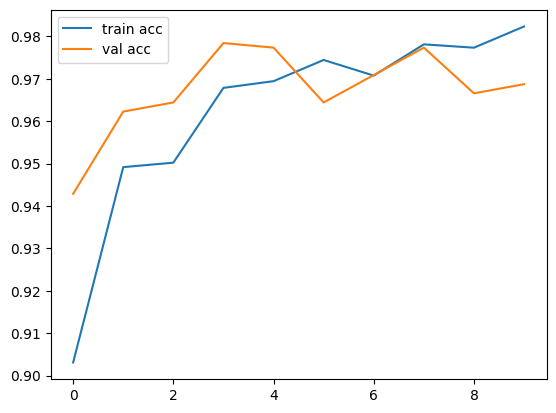

In [39]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

# **Confusion Matrix**

In [40]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  n_images = 0
  for x, y in val_gen.flow_from_directory(
      data_path,
      target_size=IMAGE_SIZE,
      shuffle=False,
      batch_size=batch_size * 2):
    i += 1
    n_images += len(y)
    if i % 50 == 0:
      print(f'{n_images} images processed.')
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [41]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

Generating confusion matrix 3830
Found 3830 images belonging to 6 classes.
2/2 [==============================] - 1s 663ms/step
3200 images processed.
2/2 [==============================] - 2s 511ms/step
[[638   2   0   0   0   0]
 [  0 640   0   0   0   0]
 [  3   0 627   0   3   7]
 [  2   1   1 635   0   1]
 [  2   0   0   0 637   1]
 [  4   4   3   1   0 618]]


valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))
print(valid_cm)

In [42]:
labels = ['Aphids', 'Army worm', 'Bacterial blight', 'Healthy', 'Powdery mildew', 'Target spot']

# **OUTPUT:**

Testing On new Images

In [44]:
from keras.models import load_model
# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
# class_names = train_dataset.class_names

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model2 = load_model('cotton_disease_model.h5')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = load_img('/content/testimg1.webp', target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(x, batch_size=32)
index = np.argmax(classes,axis=1)[0]
print(labels[index])

1/1 [==============================] - 1s 921ms/step
Target spot


In [45]:
from keras.models import load_model
# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import numpy as np
# class_names = train_dataset.class_names

# dimensions of our images
img_width, img_height = 256, 256

# load the model we saved
model2 = load_model('cotton_disease_model.h5')
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# predicting images
img = load_img('/content/test_img2.webp', target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model2.predict(x, batch_size=32)
index = np.argmax(classes,axis=1)[0]
print(labels[index])


1/1 [==============================] - 1s 905ms/step
Powdery mildew


# **Function To predict disease of cotton plant image**

In [46]:
def predict_disease(img_path = ''):
  from keras.models import load_model
  # from keras.preprocessing import image
  from keras.utils import load_img, img_to_array
  import numpy as np
  # class_names = train_dataset.class_names

  # dimensions of our images
  img_width, img_height = 256, 256

  # load the model we saved
  model2 = load_model('cotton_disease_model.h5')
  model2.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  # predicting images
  img = load_img(img_path, target_size=(img_width,img_height))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(x, batch_size=32)
  index = np.argmax(classes,axis=1)[0]
  print(labels[index])

In [47]:
predict_disease('/content/testimg1.webp')

1/1 [==============================] - 1s 991ms/step
Target spot


In [48]:
predict_disease('/content/test_img2.webp')

1/1 [==============================] - 1s 915ms/step
Powdery mildew
